## Cho DataSet lấy từ file C62.csv của các hộ gồm các trường sau:  
## MaLo: mã lô đất  MatTien: đường mặt tiền (m) DienTich: diện tích lô đất (m vuông)  LoaiDat: loại đất  
## Loại đất: 1/ 2/ x (x là số năm)_ đất nông nghiệp, đất không thời hạn, đất có thời hạn.  

Dùng jupyter notebook (hoặc mã nguồn colab) để trả lời các câu hỏi sau.  (Đặt tên file: STT_HoVaTen_MSSV.ipynb và STT_HoVaTen_MSSV.pdf)

### Câu 1 (3.0 điểm): 
##### a. Đọc dữ liệu file trên vào DataFrame có tên df và hiển thị: 5 dòng đầu tiên, 5 dòng ngẫu nhiên, kích thước df, số dòng df, số cột df
##### b. Thống kê có bao nhiêu lô đất nông nghiệp và đất đất không thời hạn và vẽ biểu đồ pie minh họa.  
##### c. In ra giá trị thống kê trung bình (mean) diện tích cho các lô có thời hạn trên 10 năm  

#### solution a: 

In [7]:
import pandas as pd
dat = pd.read_csv("C62.csv")

In [8]:
# Đọc 5 dòng đầu tiên là head , [nếu muốn đọc cuối thì tail(số dòng muốn đọc)], 
dat.head(5)

,MaLo,MatTien,DienTich,LoaiDat
0,Lô1,5,120,1
1,Lô2,10,200,2
2,Lô3,7,150,15
3,Lô4,8,180,1
4,Lô5,6,250,2


In [9]:
dat.sample(5)

,MaLo,MatTien,DienTich,LoaiDat
2,Lô3,7,150,15
16,Lô17,4,130,35
7,Lô8,3,90,2
1,Lô2,10,200,2
10,Lô11,5,220,2


In [10]:
# muốn đọc số dòng ,số cột là shape(hay được gọi là kích thước) trong đó [shape[0] là số dòng, shape[1] số cột]
print("kích thước: ", dat.shape)

kích thước:  (20, 4)


In [11]:
print("số dòng", dat.shape[0])

số dòng 20


In [12]:
print("số cột:", dat.shape[1])

số cột: 4


### solution b: 

#### đầu tiên ta cần nhớ lại là đề cho [1 / 2 / x] lần lượt là [đất nông nghiệp, đất không thời hạn, đất có thời hạn]
##### b. Thống kê có bao nhiêu lô đất nông nghiệp và đất đất không thời hạn và vẽ biểu đồ pie minh họa.  


In [13]:
# lưu trữ các biến để biết đất nông nghiệp và đất không thời hạn
dat_nong_nghiep = dat[dat['LoaiDat'] == 1]['LoaiDat'].sum()
dat_kth = dat[dat['LoaiDat'] == 2]['LoaiDat'].sum()
print(dat_nong_nghiep)
print(dat_kth)

8
12


In [14]:
# muốn vẽ biểu đồ thì trước hết nhớ lại là: 
# chỉ có biểu đồ [hist, boxplot, pie] là cần truyền vào 1 biến 
# các cái còn lại thì truyền vào 2 biến 

# sử dụng thư viện matplotlib.pyplot để vẽ 
# => bởi vì biểu đồ pie nên ta cần truyền vào 2 biến số

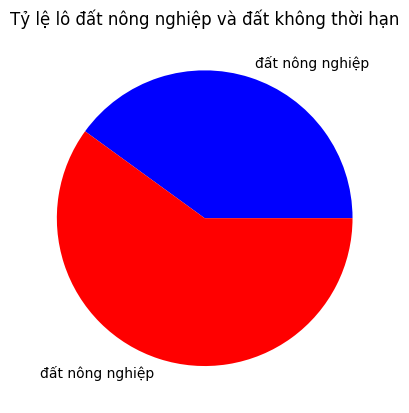

In [15]:
import matplotlib.pyplot as plt
plt.pie([dat_nong_nghiep, dat_kth], labels=['đất nông nghiệp', 'đất nông nghiệp'], colors=['blue', 'red'])
plt.title("Tỷ lệ lô đất nông nghiệp và đất không thời hạn")
plt.show()

### solution c

##### c. In ra giá trị thống kê trung bình (mean) diện tích cho các lô có thời hạn trên 10 năm  

In [16]:
trung_binh = dat[pd.to_numeric(dat['LoaiDat']) > 10]['LoaiDat'].mean()
print(trung_binh)

25.0


### Câu 2 (2.0 điểm):  Chèn thêm cột Tiền giá trị lô đất (TienGiaDat) (triệu) như sau: 
- Đất nông nghiệp: giá trị lô đất=Diện tích x 2;
- đất ở không xác định thời hạn: giá trị lô đất =Diện tích lô đất x mặt tiền2, 
- đất có thời hạn: ghi “Không xác định giá trị”; 

In [17]:
# dùng để đổi kiểu dữ liệu và string để so sánh và (cắt đi những thành phần thừa khoảng trắng .str.strip() nếu cần )
dat['LoaiDat'] = dat['LoaiDat'].astype(str)
def tinh_gia_tri_lo(row):
    if row["LoaiDat"] == "1":
        return row["DienTich"] * 2
    elif row["LoaiDat"] == "2":
        return row["DienTich"] * (row["MatTien"] ** 2)
    else:
        return "Không xác định"

dat["TienGiaDat"] = dat.apply(tinh_gia_tri_lo, axis=1)

In [18]:
dat

,MaLo,MatTien,DienTich,LoaiDat,TienGiaDat
0,Lô1,5,120,1,240
1,Lô2,10,200,2,20000
2,Lô3,7,150,15,Không xác định
3,Lô4,8,180,1,360
4,Lô5,6,250,2,9000
5,Lô6,9,300,20,Không xác định
6,Lô7,4,100,1,200
7,Lô8,3,90,2,810
8,Lô9,12,400,1,800
9,Lô10,11,350,25,Không xác định


### 3. 
- Chèn thêm cột tiền Chuyển đổi đất (ChuyenDoi)= Diện tích x 15 (triệu).
- Trong đó chỉ chuyển đỗi đất nông nghiệp (LoaiDat=1), các loại đất khác thì ghi "Chưa có công văn"  
- Hãy trích lọc ra các lô đất được phép chuyển đổi.

In [19]:
def ChuyenDoiDat(row):
    if row['LoaiDat'] == "1":
        return row['DienTich'] * 15 
    else:
        return "Chưa có công văn"
dat['ChuyenDoi'] = dat.apply(ChuyenDoiDat, axis=1)

In [20]:
dat

,MaLo,MatTien,DienTich,LoaiDat,TienGiaDat,ChuyenDoi
0,Lô1,5,120,1,240,1800
1,Lô2,10,200,2,20000,Chưa có công văn
2,Lô3,7,150,15,Không xác định,Chưa có công văn
3,Lô4,8,180,1,360,2700
4,Lô5,6,250,2,9000,Chưa có công văn
5,Lô6,9,300,20,Không xác định,Chưa có công văn
6,Lô7,4,100,1,200,1500
7,Lô8,3,90,2,810,Chưa có công văn
8,Lô9,12,400,1,800,6000
9,Lô10,11,350,25,Không xác định,Chưa có công văn


## Câu 4 (3.0 điểm): 
- a. Giả sử Diện tích có phân phối chuẩn. Hãy xây dựng hàm mật độ xác suất Diện tích 
- b. Vẽ đồ thị phân phối chuẩn cho Diện tích. Tinh chỉnh xlim, ylim cho đồ thị phù hợp 
- c. Cho biết bao nhiêu phần trăm lô đất có Diện tích dưới 120 (m vuông). bạn tạo cho tôi tập dữ liệu để tôi thử sức. bạn giải giúp tôi câu 1

In [23]:
import scipy.stats as stats
import numpy as np


<class 'pandas.core.series.Series'>


In [25]:
# mean : là giá trị trung bình, std: là độ lệch chuẩn
def ham_mat_do_xac_xuat(x, mean, std):
    return stats.norm.pdf(x, mean, std)

# ta cần tìm giá trị trung bình 
gia_tri_trung_binh = dat['DienTich'].mean()

# ta cần tìm độ lệch chuẩn
do_lech_chuan = dat['DienTich'].std()

# theo hàm mật độ xác xuất ta thấy ta cần xét x cho x bất kỳ nên x chạy từ diện tích nhỏ nhất đến diện tích lớn nhất
x = np.linspace(dat['DienTich'].min(), dat['DienTich'].max(), 100) # linspace để chia khoảng [min, max] thành 100 khoảng 
y = ham_mat_do_xac_xuat(x, gia_tri_trung_binh, do_lech_chuan)


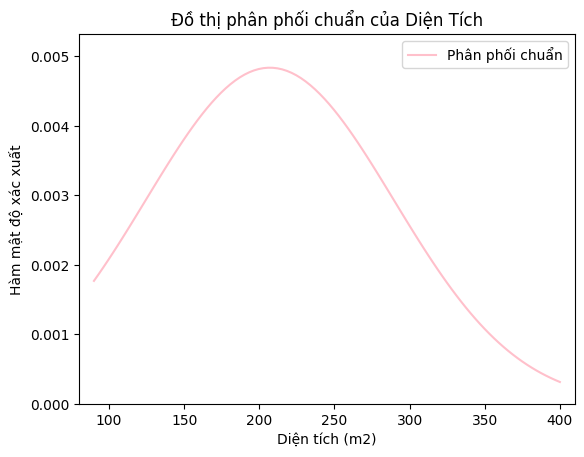

In [34]:
plt.plot(x, y, label="Phân phối chuẩn", color="pink")
plt.xlabel("Diện tích (m2)")
plt.ylabel("Hàm mật độ xác xuất")

plt.xlim(dat["DienTich"].min() - 10, dat["DienTich"].max() + 10) 
plt.ylim(0, max(y) * 1.1)  

plt.title("Đồ thị phân phối chuẩn của Diện Tích")
plt.legend() # cái mà để hiện cái label trên ra bảng
plt.show()

In [36]:
prob_less_120 = stats.norm.cdf(120, gia_tri_trung_binh, do_lech_chuan) * 100
print(f"\nPhần trăm lô đất có diện tích dưới 120m²: {prob_less_120:.2f}%")



Phần trăm lô đất có diện tích dưới 120m²: 14.57%
